**Intelligence artificielle vulgarisée (ENI) - Chapitre 11 - Un neurone pour prédire**    
Auteur : Aurélien Vannieuwenhuyze  
Modules necessaires :  
- NUMPY 1.16.3
- MATPLOTLIB : 3.0.3
- TENSORFLOW : 1.13.1


In [16]:
# importing packages
import tensorflow.compat.v1 as tf

# disabling eager mode
tf.compat.v1.disable_eager_execution()

Paramètres généraux

In [17]:
valeurs_entrees_X = [[1., 0.], [1., 1.], [0., 1.], [0., 0.]]
valeurs_a_predire_Y = [[0.], [1.], [0.], [0.]]

Paramètres du réseau Tensorflow

In [18]:
# Variable TensorFLow correspondant aux valeurs neurones d'entrée
tf_neurones_entrees_X = tf.placeholder(tf.float32, [None, 2])

#Variable TensorFlow correspondant au neurone de sortie (prédiction reele)
tf_valeurs_reelles_Y = tf.placeholder(tf.float32, [None, 1])

#-- Poids --
#Création d'une variable TensorFlow de type tableau
#contenant 2 entrées ayant chacune un 1 poids [2,1]
#Ces valeurs sont initialisées aux hasard
poids = tf.Variable(tf.random_normal([2, 1]), tf.float32)

#-- Biais initialisée à 0 --
biais = tf.Variable(tf.zeros([1, 1]), tf.float32)

#La somme pondérée est en fait une multiplication de matrice
#entre les valeur en entrées X et les différents poids
#la fonction matmul se charge de faire cette multiplication
sommeponderee = tf.matmul(tf_neurones_entrees_X,poids)

#Ajout du biais à la somme ponderee
sommeponderee = tf.add(sommeponderee,biais)

#Fonction d'activation de type sigmoide permettant de calculer la prédiction
prediction = tf.sigmoid(sommeponderee)

#Fonction d'erreur de moyenne quadratique MSE
fonction_erreur = tf.reduce_sum(tf.pow(tf_valeurs_reelles_Y-prediction,2))

#Descente de gradient avec un taux d'apprentissage fixé à 0.1
optimiseur = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(fonction_erreur)


Apprentissage

In [19]:
#Nombre d'epochs
epochs = 10000

#Initialisation des variable
init = tf.global_variables_initializer()

#Demarrage d'une session d'apprentissage
session = tf.Session()
session.run(init)

#Pour la réalisation du graphique pour la MSE
Graphique_MSE=[]


#Pour chaque epoch
for i in range(epochs):

   #Realisation de l'apprentissage avec mise à jour des poids
   session.run(optimiseur, feed_dict = {tf_neurones_entrees_X: valeurs_entrees_X, tf_valeurs_reelles_Y:valeurs_a_predire_Y})

   #Calculer l'erreur
   MSE = session.run(fonction_erreur, feed_dict = {tf_neurones_entrees_X: valeurs_entrees_X, tf_valeurs_reelles_Y:valeurs_a_predire_Y})

   #Affichage des informations
   Graphique_MSE.append(MSE)
   print("EPOCH (" + str(i) + "/" + str(epochs) + ") -  MSE: "+ str(MSE))

EPOCH (0/10000) -  MSE: 1.1732017
EPOCH (1/10000) -  MSE: 1.1623676
EPOCH (2/10000) -  MSE: 1.151971
EPOCH (3/10000) -  MSE: 1.1419911
EPOCH (4/10000) -  MSE: 1.1324061
EPOCH (5/10000) -  MSE: 1.1231952
EPOCH (6/10000) -  MSE: 1.1143372
EPOCH (7/10000) -  MSE: 1.1058118
EPOCH (8/10000) -  MSE: 1.0975987
EPOCH (9/10000) -  MSE: 1.0896784
EPOCH (10/10000) -  MSE: 1.0820317
EPOCH (11/10000) -  MSE: 1.0746408
EPOCH (12/10000) -  MSE: 1.0674875
EPOCH (13/10000) -  MSE: 1.0605552
EPOCH (14/10000) -  MSE: 1.0538276
EPOCH (15/10000) -  MSE: 1.047289
EPOCH (16/10000) -  MSE: 1.0409245
EPOCH (17/10000) -  MSE: 1.0347198
EPOCH (18/10000) -  MSE: 1.0286613
EPOCH (19/10000) -  MSE: 1.0227358
EPOCH (20/10000) -  MSE: 1.0169308
EPOCH (21/10000) -  MSE: 1.0112344
EPOCH (22/10000) -  MSE: 1.0056351
EPOCH (23/10000) -  MSE: 1.0001218
EPOCH (24/10000) -  MSE: 0.9946843
EPOCH (25/10000) -  MSE: 0.98931205
EPOCH (26/10000) -  MSE: 0.9839957
EPOCH (27/10000) -  MSE: 0.9787259
EPOCH (28/10000) -  MSE: 0.9734

Affichage graphique

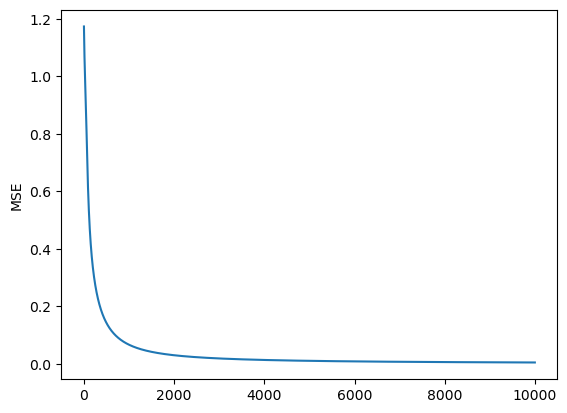

--- VERIFICATIONS ----
Observation:[1.0, 0.0] - Attendu: [0.0] - Prediction: [[0.03830179]]
Observation:[1.0, 1.0] - Attendu: [1.0] - Prediction: [[0.9545024]]
Observation:[0.0, 1.0] - Attendu: [0.0] - Prediction: [[0.03830179]]
Observation:[0.0, 0.0] - Attendu: [0.0] - Prediction: [[7.560302e-05]]


In [20]:
import matplotlib.pyplot as plt
plt.plot(Graphique_MSE)
plt.ylabel('MSE')
plt.show()

print("--- VERIFICATIONS ----")

for i in range(0,4):
    print("Observation:"+str(valeurs_entrees_X[i])+ " - Attendu: "+str(valeurs_a_predire_Y[i])+" - Prediction: "+str(session.run(prediction, feed_dict={tf_neurones_entrees_X: [valeurs_entrees_X[i]]})))



session.close()
